In [1]:
# importing the necessary libraries:
import warnings
warnings.filterwarnings("ignore")
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scrublet as scr
import leidenalg

# Reset rcParams to default values
plt.rcParams.update(plt.rcParamsDefault)


In [3]:
!which python

/opt/anaconda3/envs/scanpy/bin/python


In [17]:
# load the AnnData object
wound = sc.read('wound_with_leiden_and_umap.h5ad')

# check if the leiden clustering and UMAP are still there
print(wound.obs['leiden'])
print(wound.obsm['X_umap'])


Wound_56_1           1
Wound_65_1           0
Wound_67_1           1
Wound_413_1          1
Wound_420_1          1
                    ..
Wound_56604727_2     0
Wound_56612629_2     2
Wound_56613378_2     4
Wound_56614974_2     3
Wound_56616476_2    12
Name: leiden, Length: 16226, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']
[[ 4.254598  10.847709 ]
 [ 6.7128487  1.441644 ]
 [ 2.3346212 12.938522 ]
 ...
 [ 9.5484915 -6.3535852]
 [17.0588     6.9015737]
 [ 8.212787   8.2203865]]


In [18]:
# Step 1: Load your CSV file into a pandas DataFrame
annotation_df = pd.read_csv('../data/from_arnolda/new_annotation.csv')
print(annotation_df.head())
print(annotation_df.shape)
# Step 2: Map the barcodes to cell types
tmp = annotation_df.set_index('cell_barcode')
obs_names = wound.obs_names[wound.obs_names.isin(tmp.index)]
wound_anno = wound[obs_names]
wound_anno.obs['cell_type'] = tmp.loc[obs_names, 'cell_type']
#wound.obs['cell_type'] = wound.obs.index.map(annotation_df.set_index('cell_barcode')['cell_type'])
wound = wound_anno
print(wound.shape)


            cell_barcode    cell_type
0  Blood_Cell_10027071_3      T cells
1  Blood_Cell_10027453_3  Neutrophils
2  Blood_Cell_10027481_3  Neutrophils
3  Blood_Cell_10027805_3      B cells
4  Blood_Cell_10028175_3  Neutrophils
(26627, 2)
(16225, 25223)


In [19]:
# Check which barcodes are missing from the annotation_df
missing_barcodes = wound.obs.index[~wound.obs.index.isin(annotation_df['cell_barcode'])]

# Print the number and some examples of missing barcodes
print(f"Number of missing barcodes: {len(missing_barcodes)}")
print(missing_barcodes[:10])


Number of missing barcodes: 0
Index([], dtype='object')


In [ ]:
# saving the Anndata object
wound.write('wound_with_annotation.h5ad')

In [5]:
wound = sc.read('../scripts/wound_with_annotation.h5ad')

## Cell annotation
Andrew's original annotations are roughly ok but have a few iffy points e.g. DCs and lack of RBCs. So try to coarse grain my own clustering and give names to cell types for comparison with Andrew's

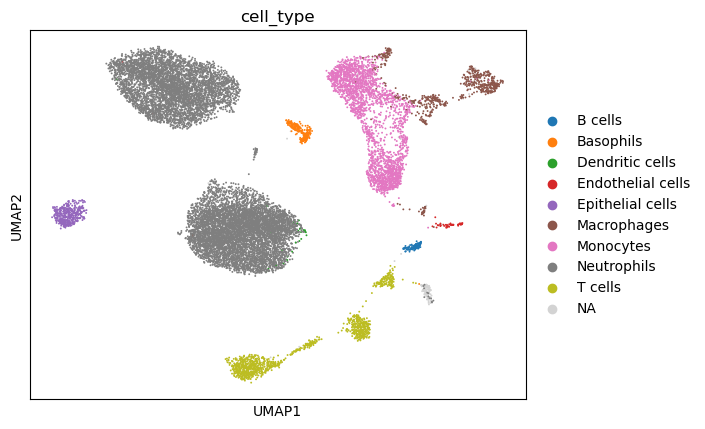

In [6]:
# Ensure 'leiden' is of type string to map properly
# Map the original 'leiden' clusters to new 'leiden_corrected' clusters
#cluster_coarse_grain_dict = {
  #  '0': '1', '1': '2', '2': '1', '3': '1', '4': '3', '5': '2', '6': '2', '7': '4', '8': '5', '9': '1', 
   # '10': '6', '11': '7', '12': '8', '13': '9', '14': '10', '15': '11', '16': '12', '17': '13', '18': '14', '19': '15', '20': '16'
#}
# Apply the mapping and convert to categorical
# wound.obs['leiden_coarse_grained'] = wound.obs['leiden'].astype(str).map(cluster_coarse_grain_dict).astype('category')

# Identify marker genes for clusters:
# sc.tl.rank_genes_groups(wound, 'leiden_corrected_Sara', method='t-test')
# sc.pl.rank_genes_groups(wound, n_genes=20, sharey=False)
# wound.obs['cluster_label'] = wound.obs['leiden_coarse_grained'].astype(str).map(lambda x: cluster_mapping.get(str(x), 'Unknown')).astype('category')
# Plot the UMAP with the corrected clusters
#sc.pl.umap(wound, color=['leiden_corrected'])


# Map the original leiden cluster labels to your custom labels
# cluster_annotation_dict = {
   # '0': 'neutrophil', '1': 'macrophage', '2': 'monocyte', '3': 'macrophage', '4': 'NKT', 
   #  '5': 'T', '6': 'basophil', '7': 'neutrophil', '8': 'erythrocyte', 
   #  '9': 'T', '10': 'B', '11': 'stem'
#}
#wound.obs['cluster_label'] = wound.obs['leiden'].astype(str).map(cluster_annotation_dict).astype('category')
sc.pl.umap(wound, color='cell_type')


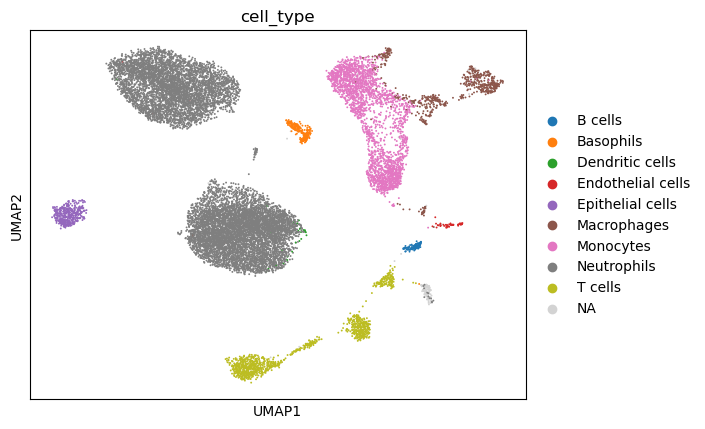

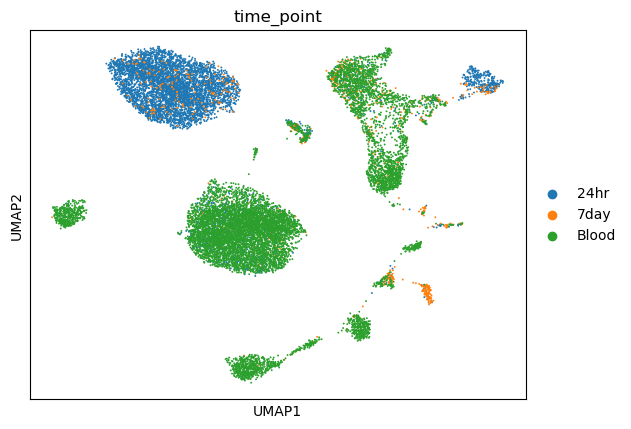

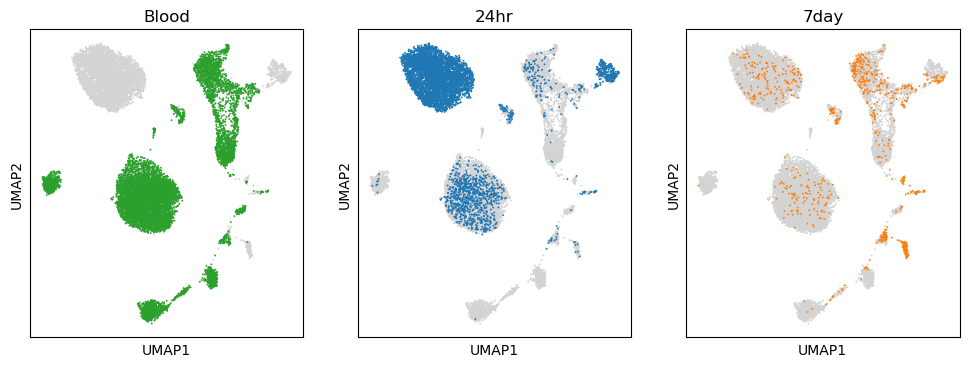

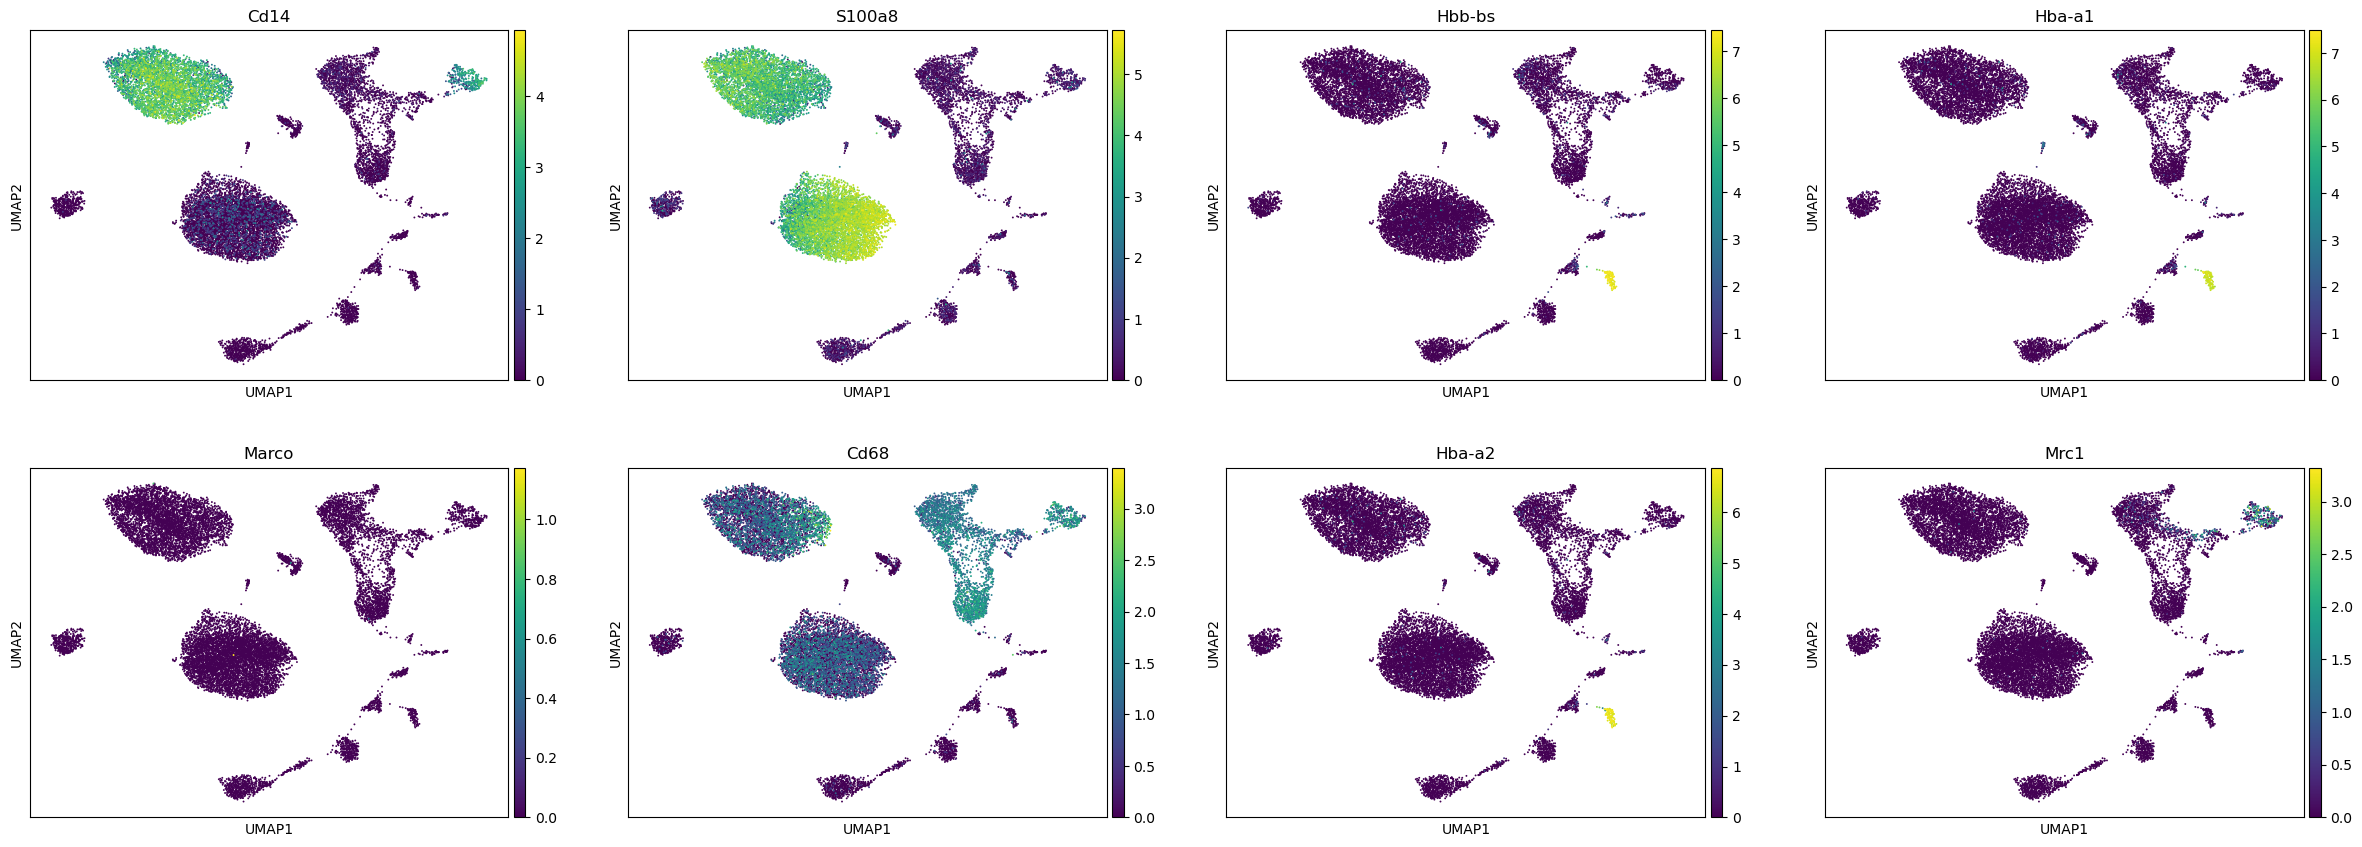

In [22]:
sc.pl.umap(wound, color=['cell_type'])
sc.pl.umap(wound, color=['time_point'])
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))
for tp, ax in zip(['Blood', '24hr', '7day'], axs.ravel()):
    sc.pl.umap(wound, color='time_point', groups=tp, title=tp, legend_loc=None, ax=ax, show=False)
plt.show()
sc.pl.umap(wound, color=['Cd14', 'S100a8', 'Hbb-bs', 'Hba-a1', 'Marco', 'Cd68', 'Hba-a2', 'Mrc1'])

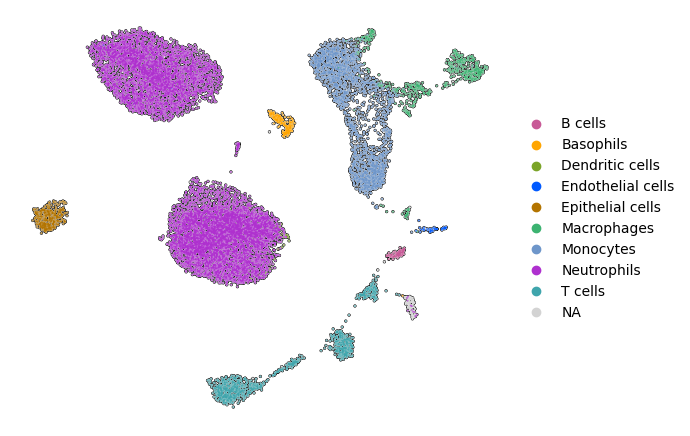

In [7]:
palette = {
    "B cells": "#c85a97", "Basophils":"#ffa500" , "Dendritic cells":"#7ba428", 
    "Endothelial cells":"#005aff", "Epithelial cells":"#b37400", "Macrophages":"#3cb371",
    "Monocytes":"#6e96ca", "Neutrophils":"#af30cf", "T cells":"#3fa5ac"
    
}
fig, ax = plt.subplots(figsize=(7, 7))
sc.pl.umap(wound, color=['cell_type'], ax=ax, palette=palette, add_outline=True, show=False)
ax.set(xlabel="", ylabel="")
ax.set_axis_off()
ax.title.set_visible(False)
ax.set_aspect(1.0)
fig.tight_layout()
plt.show()

In [23]:
sc.pl.umap(wound, color=['time_point'], ax=ax, add_outline=True, show=True)


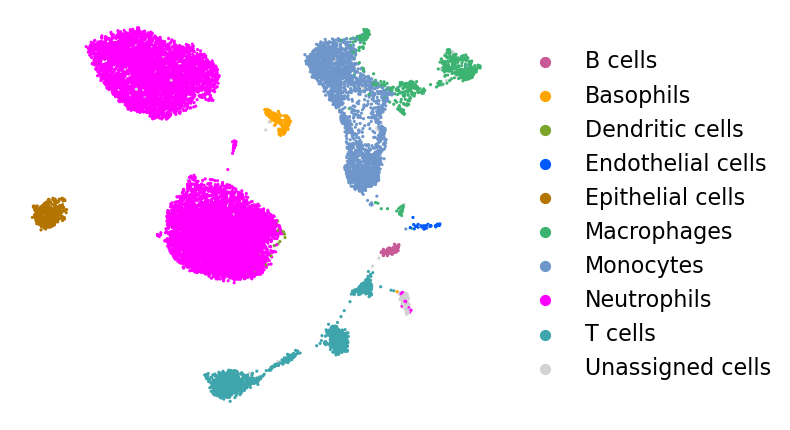

<Figure size 640x480 with 0 Axes>

In [11]:
# Define the color palette, including 'Unassigned cells'
palette = {
    "B cells": "#c85a97", "Basophils": "#ffa500", "Dendritic cells": "#7ba428",
    "Endothelial cells": "#005aff", "Epithelial cells": "#b37400", "Macrophages": "#3cb371",
    "Monocytes": "#6e96ca", "Neutrophils": "#FF00FF", "T cells": "#3fa5ac",
    "Unassigned cells": "#d3d3d3"  # Gray for unassigned cells
}

# Ensure 'cell_type' exists and replace NA values with 'Unassigned cells'
if 'cell_type' in wound.obs:
    wound.obs['cell_type'] = wound.obs['cell_type'].astype(str).replace("nan", "Unassigned cells")

fig, ax = plt.subplots(figsize=(8, 8))

# Increase legend and other text sizes using scanpy and matplotlib args
sc.pl.umap(
    wound, 
    color=['cell_type'], 
    ax=ax, 
    palette=palette, 
    add_outline=False, 
    show=False,
    size=21,                  # Dot size (optional)
    legend_fontsize=16,       # Legend font size
    legend_fontoutline=2.0    # Optional: make font outline for better visibility
)

ax.set(xlabel="", ylabel="")
ax.set_axis_off()
ax.title.set_visible(False)
ax.set_aspect(1.0)
fig.tight_layout()
ax = plt.gca()
leg = ax.get_legend()

if leg is not None:
    for handle in leg.legendHandles:
        handle.set_sizes([50])   # make legend markers bigger

plt.show()
plt.savefig("UMAP colored by cell  type.png", dpi=300, bbox_inches='tight')

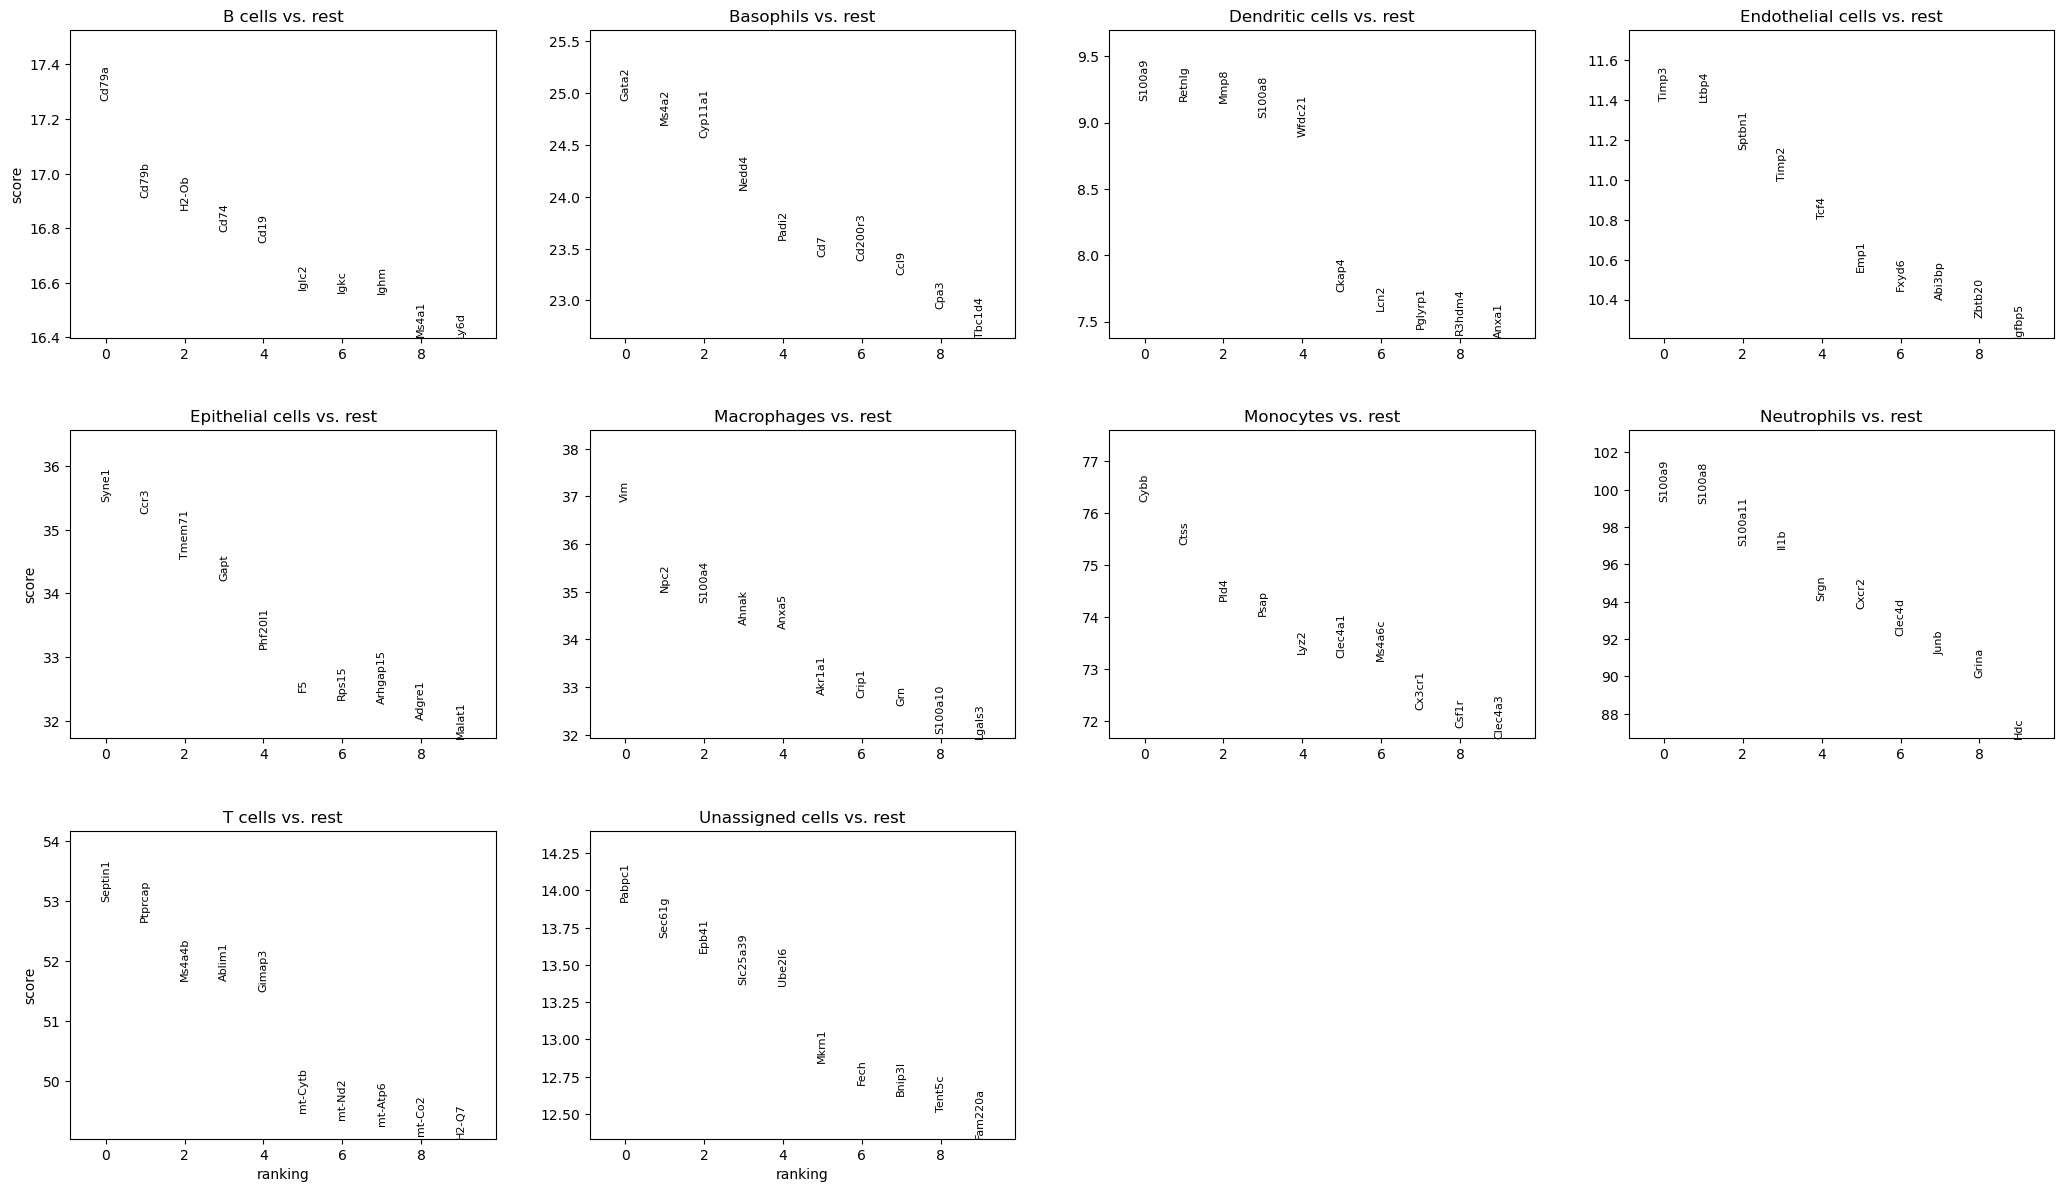

Top Neutrophil markers: ['S100a9' 'S100a8' 'S100a11' 'Il1b' 'Srgn' 'Cxcr2' 'Clec4d' 'Junb' 'Grina'
 'Hdc']


In [29]:
# Run marker gene identification
sc.tl.rank_genes_groups(wound, groupby='cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(wound, n_genes=10, sharey=False)
result = wound.uns['rank_genes_groups']
groups = result['names'].dtype.names

marker_df = pd.DataFrame(
    {group + '_' + key: result[key][group] for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']}
)
# Display top 10 marker genes for each cell type
marker_df.head(10)
neutrophil_genes = result['names']['Neutrophils'][:10]  # top 10 marker genes
print("Top Neutrophil markers:", neutrophil_genes)


In [14]:
sc.pl.umap?

Signature:
sc.pl.umap(
    adata: anndata._core.anndata.AnnData,
    *,
    color: Union[str, Sequence[str], NoneType] = None,
    gene_symbols: Optional[str] = None,
    use_raw: Optional[bool] = None,
    sort_order: bool = True,
    edges: bool = False,
    edges_width: float = 0.1,
    edges_color: Union[str, Sequence[float], Sequence[str]] = 'grey',
    neighbors_key: Optional[str] = None,
    arrows: bool = False,
    arrows_kwds: Optional[Mapping[str, Any]] = None,
    groups: Optional[str] = None,
    components: Union[str, Sequence[str]] = None,
    dimensions: Union[Tuple[int, int], Sequence[Tuple[int, int]], NoneType] = None,
    layer: Optional[str] = None,
    projection: Literal['2d', '3d'] = '2d',
    scale_factor: Optional[float] = None,
    color_map: Union[matplotlib.colors.Colormap, str, NoneType] = None,
    cmap: Union[matplotlib.colors.Colormap, str, NoneType] = None,
    palette: Union[str, Sequence[str], cycler.Cycler, NoneType] = None,
    na_color: Union[str, 

In [15]:
index = wound.obs['cell_type'] == 'Neutrophils'
cellnames = wound.obs_names[index]
wound_neutro = wound[cellnames]
print(wound_neutro.obs.columns)
print(wound_neutro.shape)

Index(['time_point', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes',
       'doublet_scores', 'predicted_doublets', 'leiden', 'cell_type'],
      dtype='object')
(11036, 25223)


In [16]:
# saving the AnnData object
wound_neutro.write('wound_with_clusternames.h5ad')

In [17]:
# check the number of cells and genes in the wound_neutro
print(wound_neutro.shape)
# View the first few rows of the `obs` DataFrame to inspect the available columns
print(wound_neutro.obs.head())
print(wound_neutro.obs.columns)  # List all column names in the obs DataFrame


(11036, 25223)
            time_point  n_genes_by_counts  log1p_n_genes_by_counts  \
Wound_56_1        24hr                874                 6.774224   
Wound_65_1        24hr               1520                 7.327123   
Wound_67_1        24hr                750                 6.621406   
Wound_413_1       24hr                831                 6.723832   
Wound_420_1       24hr               1170                 7.065613   

             total_counts  log1p_total_counts  pct_counts_in_top_50_genes  \
Wound_56_1           4393            8.387995                   50.899158   
Wound_65_1           4938            8.504918                   27.521264   
Wound_67_1           2283            7.733684                   36.224266   
Wound_413_1          2228            7.709308                   33.662478   
Wound_420_1          5006            8.518592                   36.675989   

             pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
Wound_56_1                  

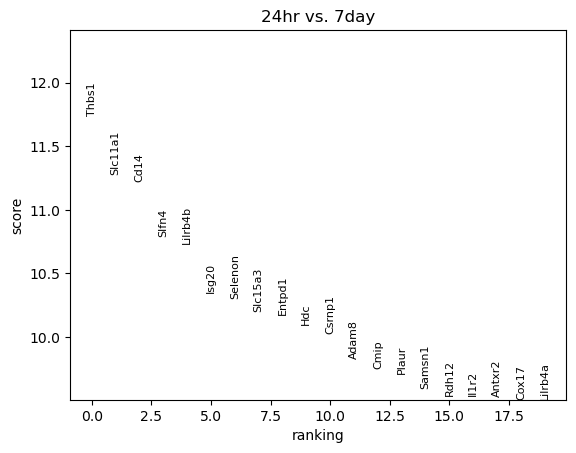

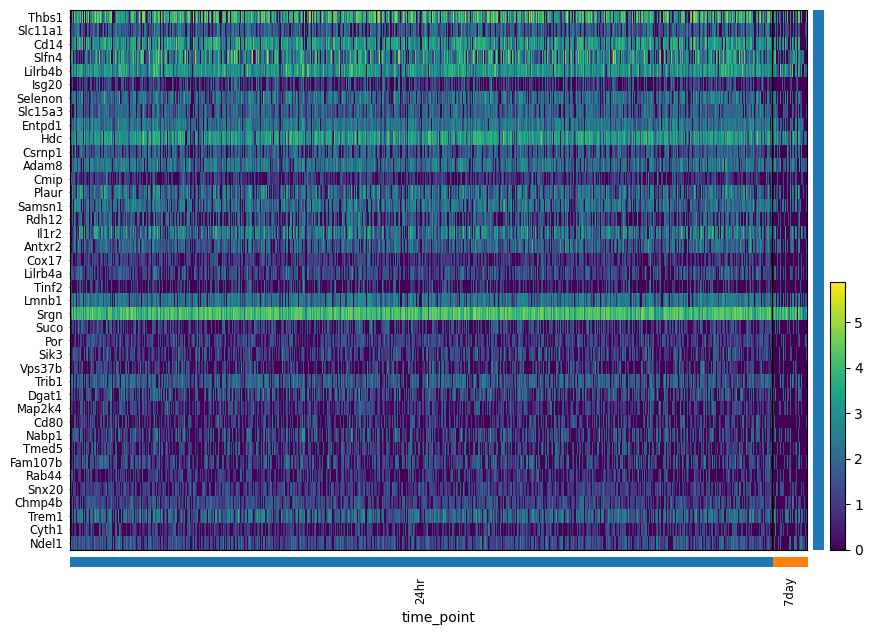

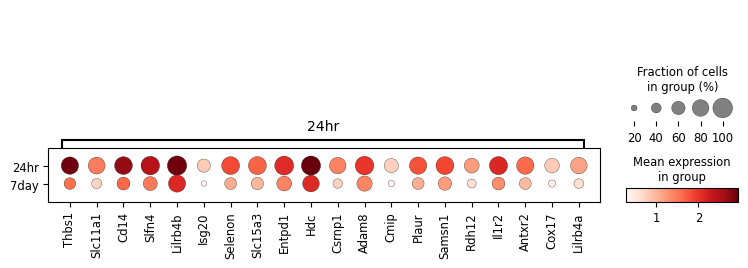

          gene    log2fc       p_value   adj_p_value
0        Thbs1  2.151470  7.644723e-32  1.142744e-27
25222   Hbb-bs -6.067105  9.061129e-32  1.142744e-27
1      Slc11a1  1.611610  1.687226e-29  1.418563e-25
2         Cd14  1.747970  3.250914e-29  2.049945e-25
3        Slfn4  1.645481  4.057052e-27  2.046620e-23


In [18]:
# Filter for 24hr and 7day timepoints
wound_neutro_24hr_7day = wound_neutro[wound_neutro.obs['time_point'].isin(['24hr', '7day']), :]

# Run DEG analysis between 24hr and 7day using the Wilcoxon method
sc.tl.rank_genes_groups(wound_neutro_24hr_7day, groupby='time_point', groups=['24hr', '7day'], reference= '7day', method='wilcoxon')

# View the top differentially expressed genes
sc.pl.rank_genes_groups(wound_neutro_24hr_7day, n_genes=20, sharey=False)

# Optionally, generate a heatmap of the top DE genes
#sc.pl.rank_genes_groups_heatmap(wound_neutro_24hr_7day, n_genes=20, groupby='time_point')

sc.pl.rank_genes_groups_heatmap(wound_neutro_24hr_7day, n_genes=40, groupby='time_point', swap_axes=True, min_logfoldchange=0.25, dendrogram=False)

# Generate a dotplot of the top 20 DE genes
sc.pl.rank_genes_groups_dotplot(wound_neutro_24hr_7day, n_genes=20, groupby='time_point')

# Extract results
deg_results = wound_neutro_24hr_7day.uns['rank_genes_groups']

# Create a DataFrame with gene names, log2 fold change, p-values, and adjusted p-values
deg_df = pd.DataFrame({
    'gene': deg_results['names']['24hr'],  # Genes ranked for 24hr vs. reference (7day)
    'log2fc': deg_results['logfoldchanges']['24hr'],  # Log2 fold change
    'p_value': deg_results['pvals']['24hr'],  # Raw p-values
    'adj_p_value': deg_results['pvals_adj']['24hr']  # Adjusted p-values (FDR corrected)
})

# Sort the DataFrame by adjusted p-value (ascending order)
deg_df = deg_df.sort_values('adj_p_value')

# View the top DEGs and save it as a scv file
print(deg_df.head())

deg_df.to_csv("DEGs_24hr_vs_7day_neutrophils.csv", index=False)



In [19]:
# Get top 100 upregulated genes (24hr vs 7day)
gene_list_topup = deg_results['names']['24hr'][:100]
print(gene_list_topup)


with open("gene_list_topup.txt", "w") as file:
    # Write each gene name to the file, one per line
    for gene in gene_list_topup:
        file.write(gene + "\n")
# Get bottom 100 downregulated genes (24hr vs 7day)
gene_list_bottom = deg_results['names']['24hr'][-100:]
print(gene_list_bottom)

with open("gene_list_bottom.txt", "w") as file:
    # Write each gene name to the file, one per line
    for gene in gene_list_bottom:
        file.write(gene + "\n")

['Thbs1' 'Slc11a1' 'Cd14' 'Slfn4' 'Lilrb4b' 'Isg20' 'Selenon' 'Slc15a3'
 'Entpd1' 'Hdc' 'Csrnp1' 'Adam8' 'Cmip' 'Plaur' 'Samsn1' 'Rdh12' 'Il1r2'
 'Antxr2' 'Cox17' 'Lilrb4a' 'Tinf2' 'Lmnb1' 'Srgn' 'Suco' 'Por' 'Sik3'
 'Vps37b' 'Trib1' 'Dgat1' 'Map2k4' 'Cd80' 'Nabp1' 'Tmed5' 'Fam107b'
 'Rab44' 'Snx20' 'Chmp4b' 'Trem1' 'Cyth1' 'Ndel1' 'Fem1c' 'Nfkbiz'
 'Mir22hg' 'G0s2' 'Tnrc18' 'Slc16a3' 'Sp140' 'Helz2' 'Glrx' 'Isy1' 'Plk3'
 'Fosl2' 'Tgm2' 'Ets2' 'Smox' 'Snx18' 'Baz2b' 'Plek' 'Cebpb' 'Rasa2'
 'Stx11' 'Kctd12' 'S100a11' 'Zc3hav1' 'Map2k3' 'Chd7' 'Sra1' 'Rgcc'
 'Sgms2' 'Pde4b' 'Itpkb' 'Cyp4f18' 'Cyth4' '4833407H14Rik' 'Rabgef1'
 'Slc27a4' 'Smchd1' 'Zswim4' 'Pim1' 'Slc25a3' '4932438A13Rik' 'Slc7a11'
 'F5' 'Csf2ra' 'Emilin2' 'Jdp2' 'Dusp5' 'Ell' 'Adprh' 'Lamp2' 'Lamb3'
 'Ankrd33b' 'Isg15' 'Cdkn1a' 'Dop1b' 'Arpc3' 'Sp100' 'Vmp1' 'Rtp4' 'Smim3']
['Hp' 'Hnrnpf' 'Cul4a' 'Aldh1a1' 'Rab3d' 'Alas2' 'Cbl' 'Adam19' 'Tmem154'
 'Rasgrp4' 'Ogfrl1' 'Msl1' 'Klf2' 'Arpc1b' 'Wasf2' 'Tsc22d3' 'Mcl1'
 'Rps27a'

In [20]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=list(gene_list_topup),
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2019_Mouse'],
                 organism='Mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [22]:
# obj.results stores all results
enr.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,13/200,2.242637e-11,9.194813e-10,0,0,15.751982,386.250947,MAP2K3;DUSP5;CEBPB;CDKN1A;LAMB3;CD80;PLEK;PLAU...
1,MSigDB_Hallmark_2020,Hypoxia,7/200,6.570538e-05,6.734801e-04,0,0,7.685609,74.014951,ISG20;CDKN1A;PIM1;PLAUR;GLRX;FOSL2;TGM2
2,MSigDB_Hallmark_2020,Interferon Gamma Response,7/200,6.570538e-05,6.734801e-04,0,0,7.685609,74.014951,ISG20;HELZ2;RTP4;CDKN1A;PIM1;PDE4B;ISG15
3,MSigDB_Hallmark_2020,Complement,7/200,6.570538e-05,6.734801e-04,0,0,7.685609,74.014951,DUSP5;CEBPB;LAMP2;PLEK;PIM1;PLAUR;F5
4,MSigDB_Hallmark_2020,Inflammatory Response,6/200,5.070298e-04,3.464704e-03,0,0,6.483659,49.191134,RTP4;CDKN1A;PDE4B;PLAUR;SGMS2;CD14
5,MSigDB_Hallmark_2020,KRAS Signaling Up,6/200,5.070298e-04,3.464704e-03,0,0,6.483659,49.191134,PLAUR;G0S2;ADAM8;GLRX;TRIB1;CSF2RA
6,MSigDB_Hallmark_2020,IL-6/JAK/STAT3 Signaling,4/87,9.530772e-04,5.582309e-03,0,0,9.948293,69.198484,IL1R2;PIM1;CD14;CSF2RA
7,MSigDB_Hallmark_2020,Interferon Alpha Response,4/97,1.428171e-03,7.319377e-03,0,0,8.874104,58.137454,HELZ2;ISG20;RTP4;ISG15
8,MSigDB_Hallmark_2020,Cholesterol Homeostasis,3/74,6.081442e-03,2.770435e-02,0,0,8.637578,44.073358,PLAUR;ANTXR2;S100A11
9,MSigDB_Hallmark_2020,DNA Repair,4/150,6.831782e-03,2.801030e-02,0,0,5.637557,28.109817,ELL;COX17;PDE4B;VPS37B


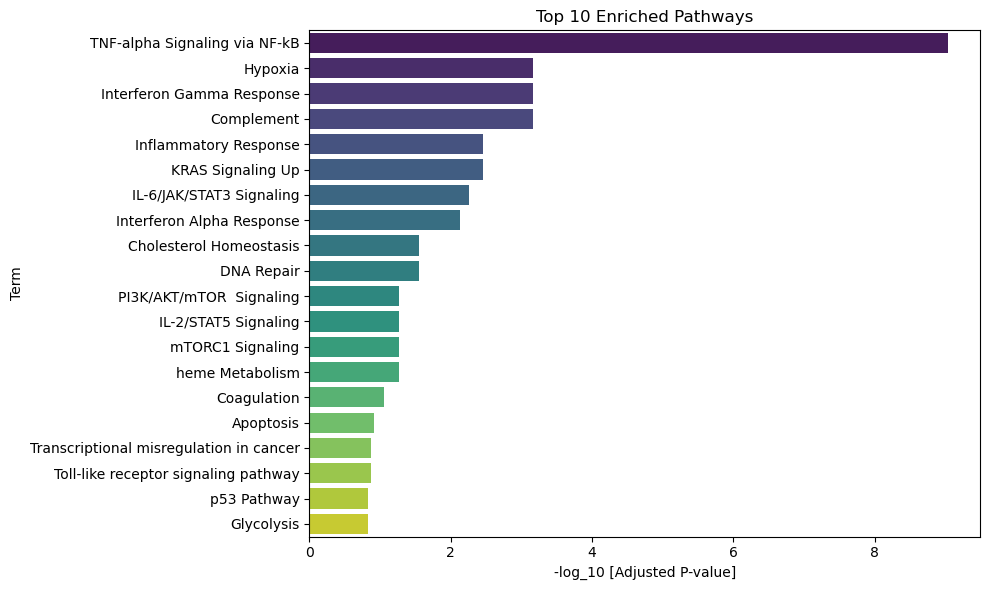

In [23]:
# Convert the results into a pandas dataframe (this might be enr.results if it’s already a dataframe)
results_df = enr.results
results_df['neglog10P'] = -np.log10(results_df['Adjusted P-value'])

# Sort the results by adjusted p-value (or any other metric you're interested in)
# Select the top 10 pathways for visualization (adjust the number based on your needs)
top_results = results_df.sort_values(by='Adjusted P-value').head(20)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a barplot with seaborn (or matplotlib)
sns.barplot(
    x='neglog10P',  # X-axis is the adjusted p-value
    y='Term',  # Y-axis is the name of the enriched pathway (or "Term" column)
    data=top_results,
    palette='viridis'  # You can choose a color palette you like
)

# Add labels and title
plt.xlabel('-log_10 [Adjusted P-value]')
plt.title('Top 10 Enriched Pathways')

# Show the plot
plt.tight_layout()
plt.show()

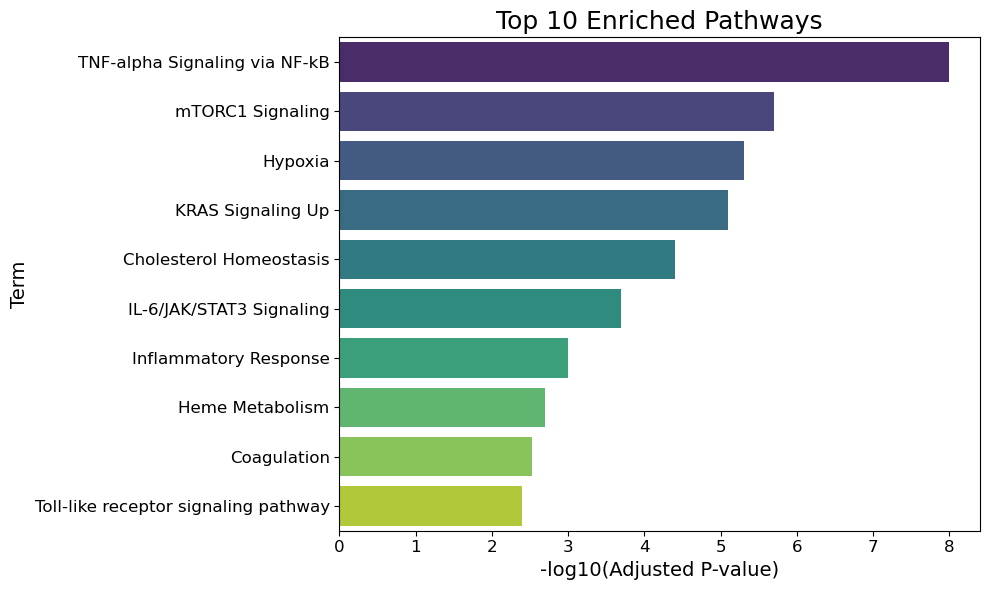

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = {
    "Term": [
        "TNF-alpha Signaling via NF-kB", "Hypoxia", "mTORC1 Signaling", 
        "KRAS Signaling Up", "Cholesterol Homeostasis", "IL-6/JAK/STAT3 Signaling",
        "Inflammatory Response", "Heme Metabolism", "Coagulation", 
        "Toll-like receptor signaling pathway", "Amoebiasis", "Tuberculosis",
        "Phagocytosis", "Endocytosis", "C-type lectin receptor signaling pathway",
        "MAPK signaling pathway", "Salmonella infection", "PI3K/AKT/mTOR Signaling",
        "IL-2/STAT5 Signaling", "Interferon Gamma Response"
    ],
    "P-value": [
        1e-8, 5e-6, 2e-6, 8e-6, 4e-5, 2e-4, 1e-3, 2e-3, 3e-3,
        4e-3, 6e-3, 7e-3, 8e-3, 9e-3, 1e-2, 1.5e-2, 2e-2, 3e-2,
        4e-2, 5e-2
    ]
}

import pandas as pd
df = pd.DataFrame(data)
df['-log10(P-value)'] = -np.log10(df['P-value'])

# Sort and select the top 10 terms
top_10 = df.nlargest(10, '-log10(P-value)')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y='Term', x='-log10(P-value)', palette='viridis')

# Increase font size for title, axes, and ticks
plt.title("Top 10 Enriched Pathways", fontsize=18)
plt.xlabel("-log10(Adjusted P-value)", fontsize=14)
plt.ylabel("Term", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [25]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr_bottom = gp.enrichr(gene_list=list(gene_list_bottom),
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2019_Mouse'],
                 organism='Mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [26]:
# obj.results stores all results
enr_bottom.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Apical Junction,7/200,0.000066,0.001971,0,0,7.685609,74.014951,PTPRC;PTEN;RAC2;MSN;MMP9;SKAP2;GNAI2
1,MSigDB_Hallmark_2020,Mitotic Spindle,5/199,0.003253,0.033238,0,0,5.346175,30.623179,CDC42;AKAP13;MARCKS;SSH2;WASF2
2,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,5/200,0.003324,0.033238,0,0,5.318489,30.350700,MARCKS;ZFP36;TNFAIP2;KLF2;MCL1
3,MSigDB_Hallmark_2020,Apoptosis,4/161,0.008723,0.065422,0,0,5.239650,24.845392,GPX1;HMGB2;TXNIP;MCL1
4,MSigDB_Hallmark_2020,Allograft Rejection,4/200,0.018073,0.108440,0,0,4.188776,16.810890,RPS9;PTPRC;IGSF6;MMP9
5,MSigDB_Hallmark_2020,Coagulation,3/138,0.032004,0.160021,0,0,4.528064,15.585083,GDA;MMP8;MMP9
6,MSigDB_Hallmark_2020,IL-6/JAK/STAT3 Signaling,2/87,0.070424,0.169090,0,0,4.757503,12.622689,CSF3R;CBL
7,MSigDB_Hallmark_2020,Hypoxia,3/200,0.078909,0.169090,0,0,3.093254,7.855210,ZFP36;AMPD3;ALDOA
8,MSigDB_Hallmark_2020,G2-M Checkpoint,3/200,0.078909,0.169090,0,0,3.093254,7.855210,CUL4A;MARCKS;TMPO
9,MSigDB_Hallmark_2020,Interferon Gamma Response,3/200,0.078909,0.169090,0,0,3.093254,7.855210,MARCHF1;TNFAIP2;TXNIP


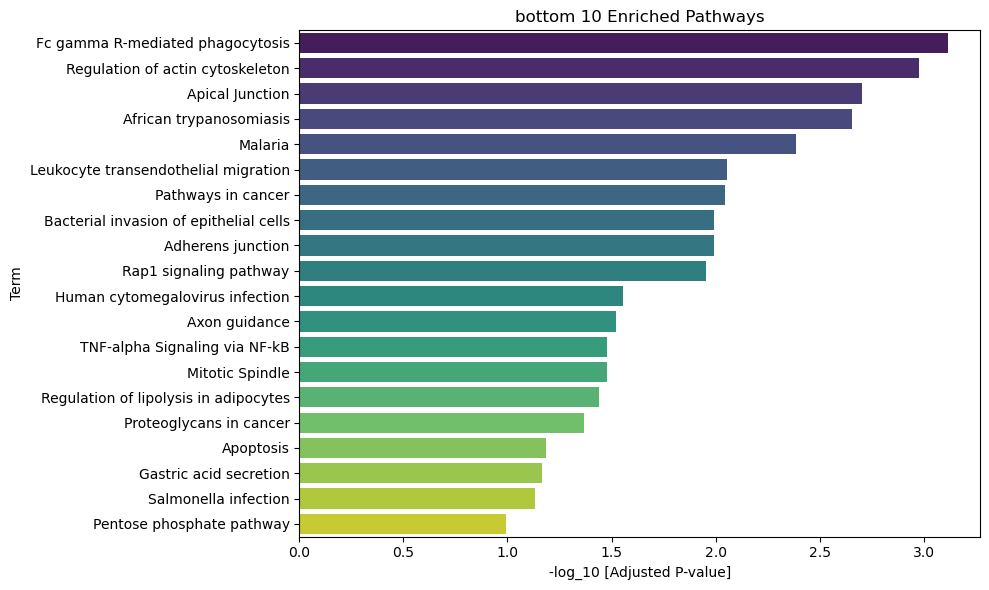

In [27]:
# Convert the results into a pandas dataframe (this might be enr.results if it’s already a dataframe)
results_df_bottom = enr_bottom.results
results_df_bottom['neglog10P'] = -np.log10(results_df_bottom['Adjusted P-value'])

# Sort the results by adjusted p-value (or any other metric you're interested in)
# Select the top 10 pathways for visualization (adjust the number based on your needs)
bottom_results = results_df_bottom.sort_values(by='Adjusted P-value').head(20)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a barplot with seaborn (or matplotlib)
sns.barplot(
    x='neglog10P',  # X-axis is the adjusted p-value
    y='Term',  # Y-axis is the name of the enriched pathway (or "Term" column)
    data=bottom_results,
    palette='viridis'  # You can choose a color palette you like
)

# Add labels and title
plt.xlabel('-log_10 [Adjusted P-value]')
plt.title('bottom 10 Enriched Pathways')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
%history

In [28]:
# Filter genes based on the specified conditions
filtered_deg = deg_df[(deg_df['adj_p_value'] < 0.05)]

# Check the first few rows of the filtered DataFrame
print(filtered_deg.head())

# Save filtered results to a file if needed
filtered_deg.to_csv("filtered_genes.csv", index=False)

# Sort the DataFrame by adj_p_value (ascending order)
sorted_deg = filtered_deg.sort_values('adj_p_value')
print(sorted_deg.head())

#sort the dataframe by log2fc (descending order)
sorted_deg2= sorted_deg.sort_values('log2fc', ascending=False)
print(sorted_deg2.head())

          gene    log2fc       p_value   adj_p_value
0        Thbs1  2.151470  7.644723e-32  1.142744e-27
25222   Hbb-bs -6.067105  9.061129e-32  1.142744e-27
1      Slc11a1  1.611610  1.687226e-29  1.418563e-25
2         Cd14  1.747970  3.250914e-29  2.049945e-25
3        Slfn4  1.645481  4.057052e-27  2.046620e-23
          gene    log2fc       p_value   adj_p_value
0        Thbs1  2.151470  7.644723e-32  1.142744e-27
25222   Hbb-bs -6.067105  9.061129e-32  1.142744e-27
1      Slc11a1  1.611610  1.687226e-29  1.418563e-25
2         Cd14  1.747970  3.250914e-29  2.049945e-25
3        Slfn4  1.645481  4.057052e-27  2.046620e-23
        gene    log2fc       p_value   adj_p_value
631  Gm1604a  2.532372  3.004874e-04  1.184249e-02
580    Sh2d5  2.411497  1.656185e-04  7.104414e-03
229  Tspan31  2.338281  6.062400e-08  6.562743e-06
20     Tinf2  2.305593  2.200382e-21  2.522738e-18
0      Thbs1  2.151470  7.644723e-32  1.142744e-27


In [29]:
gene_list = deg_results['names']['24hr'][:]
with open("gene_list.txt", "w") as file:
    # Write each gene name to the file, one per line
    for gene in gene_list:
        file.write(gene + "\n")


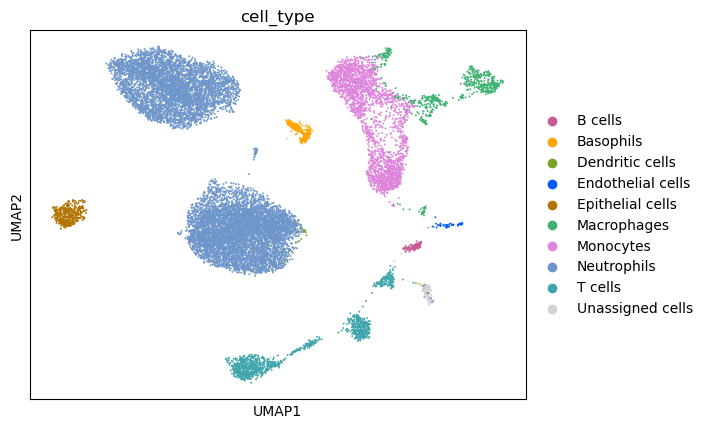

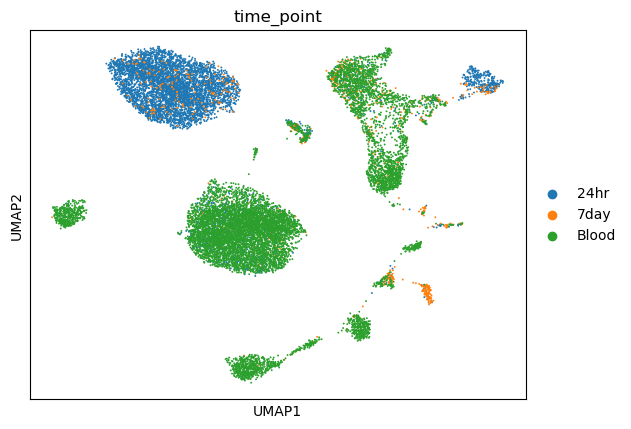

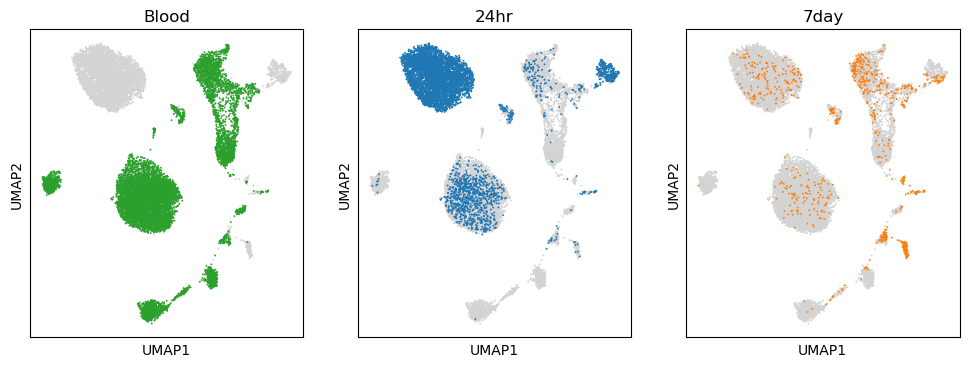

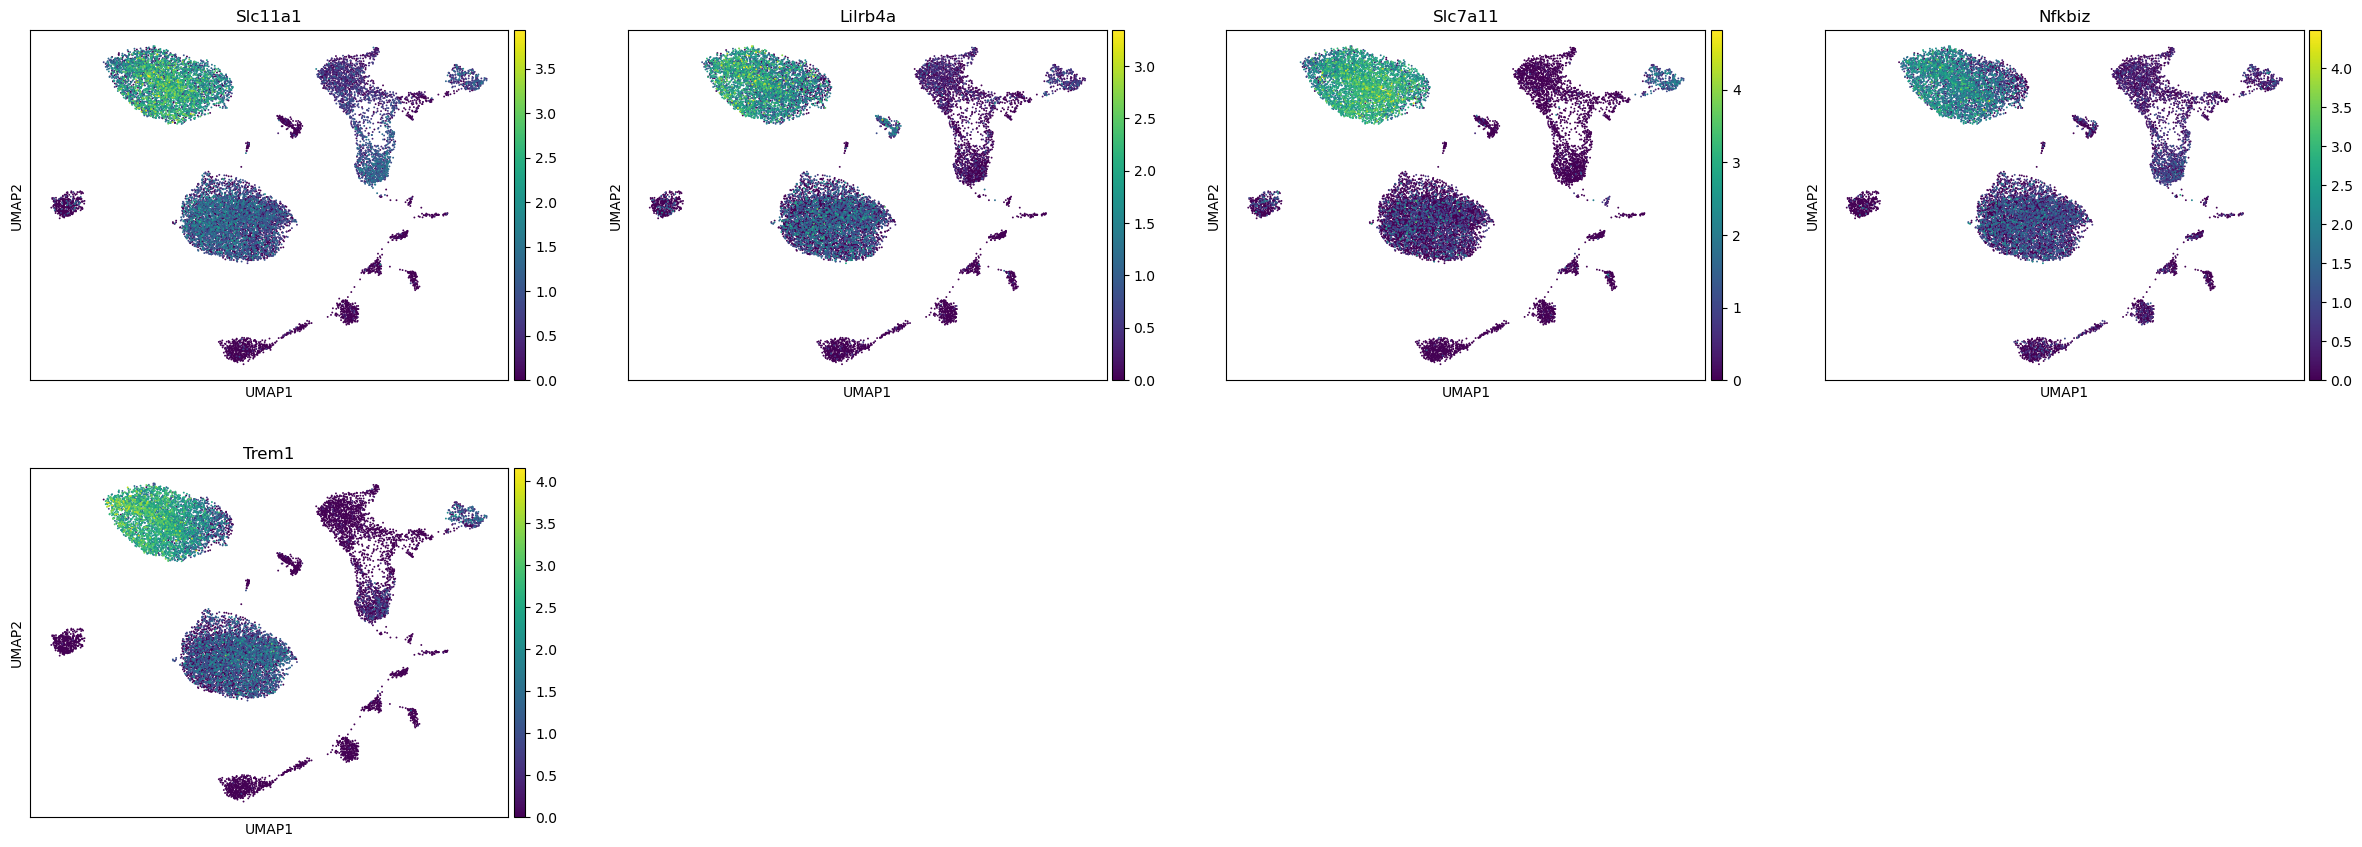

In [30]:
sc.pl.umap(wound, color=['cell_type'])
sc.pl.umap(wound, color=['time_point'])
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))
for tp, ax in zip(['Blood', '24hr', '7day'], axs.ravel()):
    sc.pl.umap(wound, color='time_point', groups=tp, title=tp, legend_loc=None, ax=ax, show=False)
plt.show()
sc.pl.umap(wound, color=['Slc11a1', 'Lilrb4a', 'Slc7a11', 'Nfkbiz', 'Trem1'])

In [31]:
wound.obs.groupby(['cell_type']).size()

cell_type
B cells                100
Basophils              214
Dendritic cells         33
Endothelial cells       53
Epithelial cells       450
Macrophages            611
Monocytes             2382
Neutrophils          11036
T cells               1162
Unassigned cells       184
dtype: int64